In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import load

In [47]:
df = pd.read_csv('data_for_database.csv')

In [48]:
df

,name,height,weight,reach,age,dob,wins,losses,draws,str_landed_per_min,str_acc,str_absorb_per_min,str_def,td_avg,td_acc,td_def,sub_avg,win_percentage
0,Aalon Cruz,1.83,145.0,1.98,30.44,1989-09-20,8,2,0,1.41,0.17,20.42,0.76,0.00,0.0,0.00,0.0,0.80
1,Aaron Brink,1.91,205.0,1.91,26.02,1974-11-12,25,20,0,0.00,0.00,2.17,0.50,0.00,0.0,1.00,0.0,0.56
2,Aaron Phillips,1.75,135.0,1.78,25.05,1989-08-05,8,1,0,15.33,0.82,8.00,0.70,0.00,0.0,0.67,0.0,0.89
3,Aaron Riley,1.73,155.0,1.75,32.63,1980-12-09,29,13,1,1.73,0.15,3.87,0.40,0.00,0.0,0.33,0.0,0.67
4,Aaron Rosa,1.93,205.0,1.98,28.76,1983-05-28,17,4,0,7.51,0.55,17.37,0.74,0.00,0.0,0.00,0.0,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Zane Frazier,1.96,250.0,1.96,6.52,1989-11-09,4,10,0,0.31,0.50,0.31,0.50,0.00,0.0,0.00,0.0,0.29
1962,Zarah Fairn,1.73,145.0,1.83,33.22,1986-12-12,6,3,0,3.87,0.48,3.87,0.48,0.00,0.0,0.00,0.0,0.67
1963,Zelim Imadaev,1.83,170.0,1.93,24.79,1995-01-25,8,1,0,3.84,0.45,3.84,0.45,1.52,1.0,1.00,0.0,0.89
1964,Zu Anyanwu,1.85,251.0,1.96,36.12,1981-08-05,14,4,0,2.47,0.44,2.47,0.44,0.00,0.0,0.00,0.0,0.78


In [49]:
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%M-%d').dt.date
df['age'] = pd.datetime.now().date() - df['dob']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)

In [50]:
df.fillna(0, inplace=True)

In [52]:
df['wins'].loc[df['name'] == "Israel Adesanya"].values[0]

18

In [53]:
df['wins'][df['name'] == "Israel Adesanya"].values[0]

18

In [54]:
df[df['name'] == "Israel Adesanya"]

,name,height,weight,reach,age,dob,wins,losses,draws,str_landed_per_min,str_acc,str_absorb_per_min,str_def,td_avg,td_acc,td_def,sub_avg,win_percentage
747,Israel Adesanya,1.93,185.0,2.03,30.63,1989-07-22,18,0,0,1.92,0.36,1.6,0.45,0.0,0.0,0.0,0.0,1.0


In [55]:
f1_name = "Israel Adesanya"

In [56]:
f2_name = "Yoel Romero"

In [57]:
f1_height = df['height'][df['name'] == "Israel Adesanya"].values[0]

In [58]:
f2_height = df['height'][df['name'] == "Yoel Romero"].values[0]

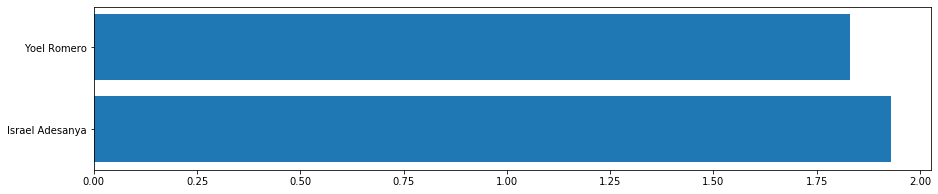

In [59]:
plt.figure(figsize=(15,3))
plt.autoscale(enable=True, axis='x')
plt.barh([f1_name, f2_name],[f1_height, f2_height])
plt.show()

In [60]:
scaler = load(open('scaler.pkl', 'rb'))

In [61]:
fighter_1 = df.loc[df['name'] == "Israel Adesanya"]
fighter_2 = df.loc[df['name'] == "Yoel Romero"]

In [73]:
fighter_1

,name,height,weight,reach,age,dob,wins,losses,draws,str_landed_per_min,str_acc,str_absorb_per_min,str_def,td_avg,td_acc,td_def,sub_avg,win_percentage
747,Israel Adesanya,1.93,185.0,2.03,30.63,1989-07-22,18,0,0,1.92,0.36,1.6,0.45,0.0,0.0,0.0,0.0,1.0


In [62]:
fighter_2

,name,height,weight,reach,age,dob,wins,losses,draws,str_landed_per_min,str_acc,str_absorb_per_min,str_def,td_avg,td_acc,td_def,sub_avg,win_percentage
1937,Yoel Romero,1.83,185.0,1.85,42.85,1977-04-30,12,5,0,1.6,0.45,1.6,0.45,0.0,0.0,0.0,0.0,0.71


In [63]:
new_cols = ['height_diff','reach_diff','weight_diff','age_diff','str_landed_per_min_diff','str_acc_diff',
            'str_absorb_per_min_diff','str_def_diff','td_avg_diff','td_acc_diff','td_def_diff',
            'sub_avg_diff','win_percentage_diff']
old_cols = [col.replace('_diff','') for col in new_cols]

In [64]:
df_diff = pd.DataFrame()
for i in range(len(new_cols)):
    df_diff[new_cols[i]] = fighter_1[old_cols[i]].values - fighter_2[old_cols[i]].values

In [65]:
df_diff

,height_diff,reach_diff,weight_diff,age_diff,str_landed_per_min_diff,str_acc_diff,str_absorb_per_min_diff,str_def_diff,td_avg_diff,td_acc_diff,td_def_diff,sub_avg_diff,win_percentage_diff
0,0.1,0.18,0.0,-12.22,0.32,-0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.29


In [66]:
df_diff.shape

(1, 13)

In [67]:
scaler = load(open('scaler.pkl', 'rb'))

In [70]:
data = scaler.transform(df_diff)

/Users/ravimalde/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [72]:
data

array([[ 1.54112546, -0.0032178 ,  2.1803432 , -2.20519399,  0.06255052,
        -0.53463392,  0.0456376 ,  0.01782772, -0.00692269, -0.0338658 ,
        -0.00306617, -0.00717179,  1.60897398]])

In [69]:
model = load(open('model.pkl', 'rb'))

In [78]:
prediction = model.predict(data)[0]

In [79]:
prediction

1

In [97]:
prob = model.predict_proba(data)

In [102]:
prob_win = round(prob[0][1], 2)
prob_loss = round(prob[0][0], 2)

In [103]:
prob_win

0.68

In [114]:
fighter1_wins = df['wins'].loc[df['name'] == "Israel Adesanya"].values[0]
fighter1_losses = df['draws'].loc[df['name'] == "Israel Adesanya"].values[0]
fighter1_draws = df['losses'].loc[df['name'] == "Israel Adesanya"].values[0]

fighter2_wins = df['wins'].loc[df['name'] == "Yoel Romero"].values[0]
fighter2_losses = df['draws'].loc[df['name'] == "Yoel Romero"].values[0]
fighter2_draws = df['losses'].loc[df['name'] == "Yoel Romero"].values[0]

labels = ['Draws','Losses','Wins']
fighter1_record = [fighter1_draws, fighter1_losses, fighter1_wins]
fighter2_record = [fighter2_draws, fighter2_losses, fighter2_wins]

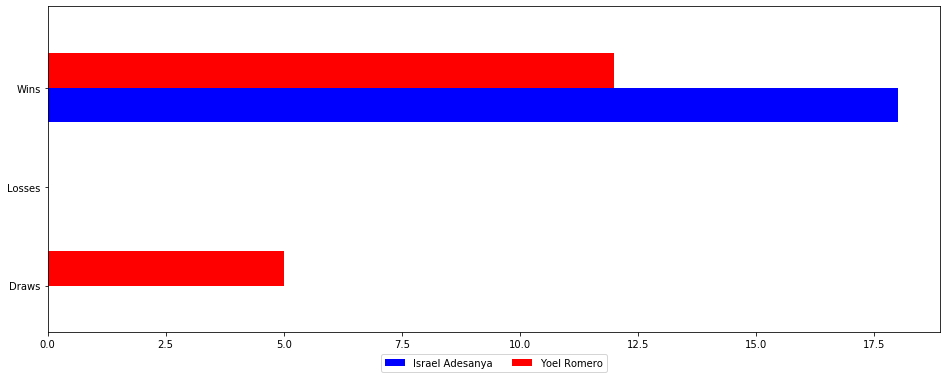

In [116]:
ind = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(16,6))
ax.barh(ind, fighter1_record, width, label="Israel Adesanya", color='blue')
ax.barh(ind + width, fighter2_record, width, label="Yoel Romero", color='red')
ax.set(yticks=ind+width/2, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=False, ncol=2)